In [1]:
pip install opencv-python matplotlib numpy


Note: you may need to restart the kernel to use updated packages.


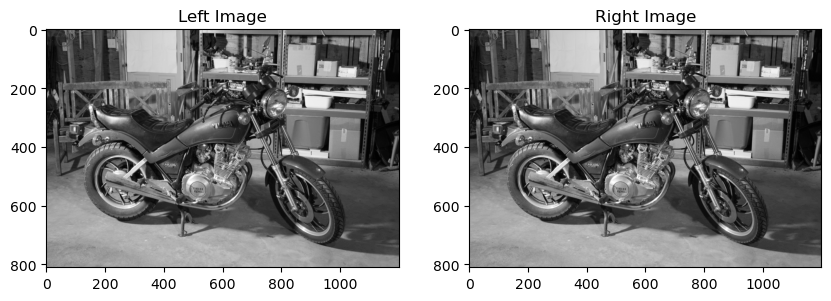

In [11]:
import cv2
import matplotlib.pyplot as plt

# Load left and right stereo images
left_image_path = r"C:\Users\yashu\Pictures\im1_1200.png"
right_image_path = r"C:\Users\yashu\Pictures\im1_1200.png"

left_img = cv2.imread(left_image_path, cv2.IMREAD_GRAYSCALE)
right_img = cv2.imread(right_image_path, cv2.IMREAD_GRAYSCALE)

# Display the images
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.title("Left Image")
plt.imshow(left_img, cmap='gray')
plt.subplot(1, 2, 2)
plt.title("Right Image")
plt.imshow(right_img, cmap='gray')
plt.show()


In [12]:
print(left_img.shape)
print(right_img.shape)


(810, 1200)
(810, 1200)


In [13]:
from PIL import Image

# Convert .webp to .png
input_path = r"C:\Users\yashu\Pictures\im1_1200.png"
output_path = r"C:\Users\yashu\Pictures\left_image.png"

# Open and save as .png
img = Image.open(input_path)
img.save(output_path)

print("Image converted to PNG format.")


Image converted to PNG format.


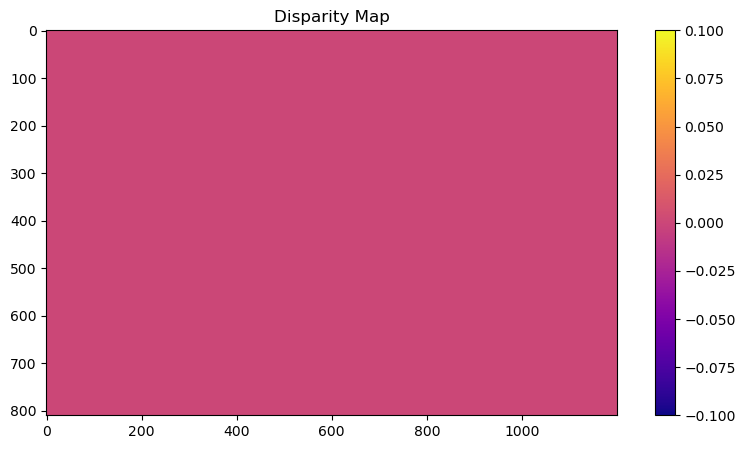

In [14]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load stereo images (ensure images are the same size and in grayscale)
left_img = cv2.imread(r"C:\Users\yashu\Pictures\im1_1200.png", cv2.IMREAD_GRAYSCALE)
right_img = cv2.imread(r"C:\Users\yashu\Pictures\left_image.png", cv2.IMREAD_GRAYSCALE)

# Check if images loaded correctly
if left_img is None or right_img is None:
    raise ValueError("One or both images could not be loaded. Check the file paths.")

# Resize right image to match left image (if needed)
if left_img.shape != right_img.shape:
    right_img = cv2.resize(right_img, (left_img.shape[1], left_img.shape[0]))

# Initialize the stereo block matching object
stereo = cv2.StereoBM_create(numDisparities=16*5, blockSize=15)

# Compute the disparity map
disparity = stereo.compute(left_img, right_img)

# Handle invalid disparity values
disparity[disparity < 0] = 0

# Normalize the disparity map for visualization
disparity_normalized = cv2.normalize(disparity, None, alpha=0, beta=255, norm_type=cv2.NORM_MINMAX)
disparity_normalized = np.uint8(disparity_normalized)

# Display the disparity map
plt.figure(figsize=(10, 5))
plt.title("Disparity Map")
plt.imshow(disparity_normalized, cmap='plasma')
plt.colorbar()
plt.show()


C:\Users\yashu\AppData\Local\Temp\ipykernel_19068\543177127.py:9: RuntimeWarning: divide by zero encountered in divide
  depth = (focal_length * baseline) / disparity


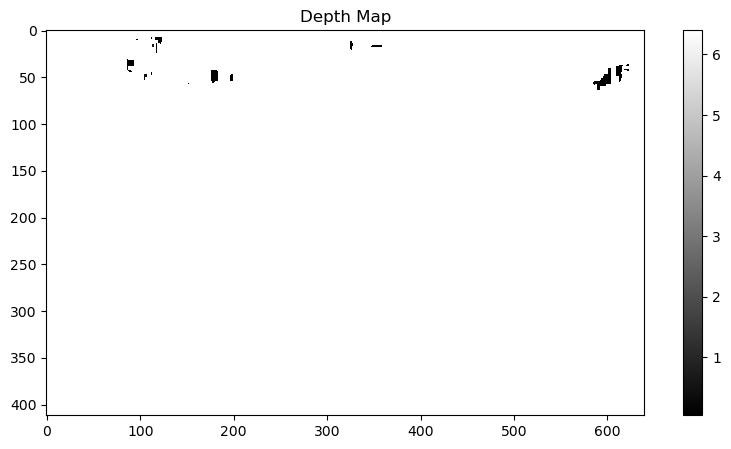

In [10]:
# Example camera parameters
focal_length = 0.8 * left_img.shape[1]  # Approximation
baseline = 0.1  # Baseline in meters

# Avoid division by zero in disparity
disparity[disparity <= 0] = 0.1

# Calculate depth
depth = (focal_length * baseline) / disparity

# Display the depth map
plt.figure(figsize=(10, 5))
plt.title("Depth Map")
plt.imshow(depth, cmap='gray')
plt.colorbar()
plt.show()


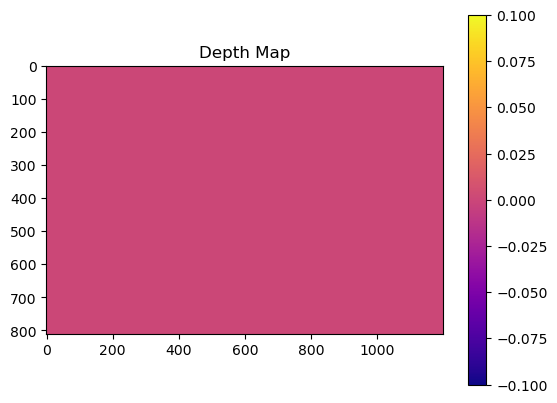

In [15]:
# Define camera parameters
focal_length = 700  # Example focal length (in pixels)
baseline = 0.1  # Example baseline distance between cameras (in meters)

# Compute depth map (depth = focal_length * baseline / disparity)
depth_map = (focal_length * baseline) / (disparity + 1e-5)  # Adding small value to avoid division by zero

# Normalize depth map for visualization
depth_normalized = cv2.normalize(depth_map, None, alpha=0, beta=255, norm_type=cv2.NORM_MINMAX)
depth_normalized = np.uint8(depth_normalized)

# Display depth map
plt.imshow(depth_normalized, cmap='plasma')
plt.colorbar()
plt.title("Depth Map")
plt.show()


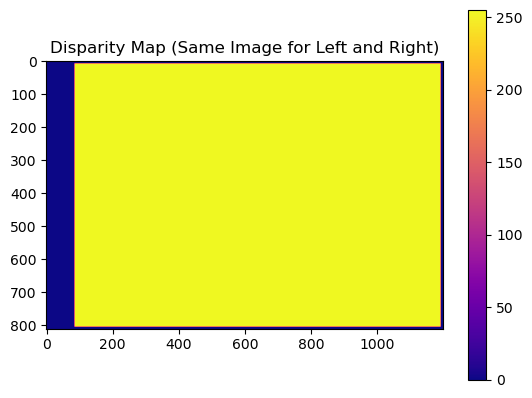

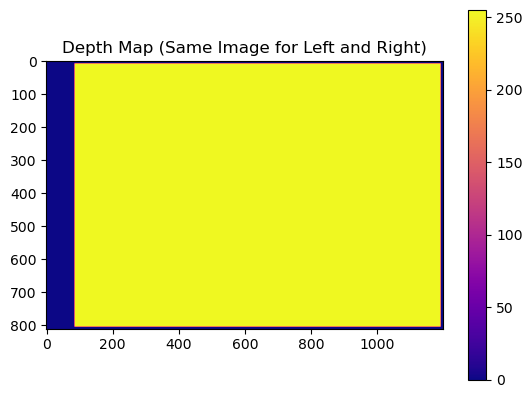

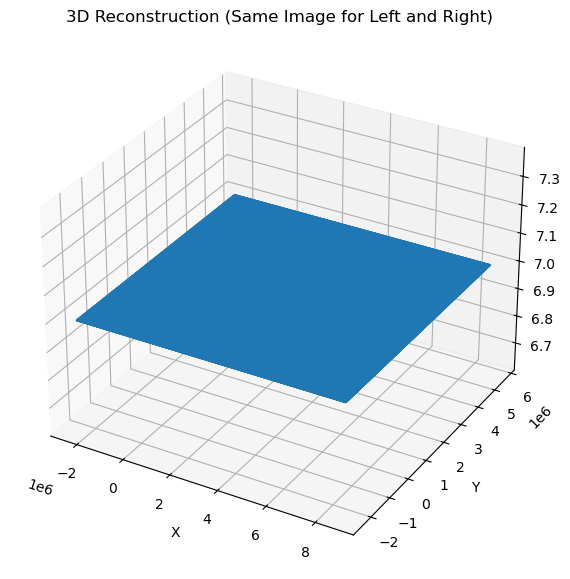

In [3]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Example focal length and principal point (adjust these values as needed)
focal_length = 700  # Example focal length in pixels
c_x, c_y = 320, 240  # Example principal point (center of the image)

# Load the same image for both left and right
image_path = r"C:\Users\yashu\Pictures\left_image.png"  # Same image for both sides
left_img = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
right_img = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

# Ensure both images are loaded correctly
if left_img is None or right_img is None:
    raise ValueError("One or both images could not be loaded. Check the file paths.")

# Compute the disparity map using Stereo Block Matching (using the same image)
stereo = cv2.StereoBM_create(numDisparities=16*5, blockSize=15)
disparity = stereo.compute(left_img, right_img)

# Normalize the disparity map for better visualization
disparity_normalized = cv2.normalize(disparity, None, alpha=0, beta=255, norm_type=cv2.NORM_MINMAX)
disparity_normalized = np.uint8(disparity_normalized)

# Display the disparity map
plt.imshow(disparity_normalized, cmap='plasma')
plt.colorbar()
plt.title("Disparity Map (Same Image for Left and Right)")
plt.show()

# Calculate the depth map from the disparity map (assuming baseline = 0.1 meters)
baseline = 0.1  # Distance between the two cameras (in meters)
depth_map = (focal_length * baseline) / (disparity + 1e-5)  # Use a small epsilon to avoid division by zero

# Normalize the depth map for better visualization
depth_normalized = cv2.normalize(depth_map, None, alpha=0, beta=255, norm_type=cv2.NORM_MINMAX)
depth_normalized = np.uint8(depth_normalized)

# Display the depth map
plt.imshow(depth_normalized, cmap='plasma')
plt.colorbar()
plt.title("Depth Map (Same Image for Left and Right)")
plt.show()

# Create a 3D point cloud from the depth map
height, width = depth_map.shape
points_3d = []

for y in range(height):
    for x in range(width):
        Z = depth_map[y, x]
        if Z > 0:  # Only consider valid depth values
            # Compute corresponding 3D coordinates (X, Y, Z)
            X = (x - c_x) * Z / focal_length
            Y = (y - c_y) * Z / focal_length
            points_3d.append([X, Y, Z])

# Convert list of 3D points to numpy array
points_3d = np.array(points_3d)

# Visualize the 3D point cloud using matplotlib
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')

# Scatter plot of 3D points
ax.scatter(points_3d[:, 0], points_3d[:, 1], points_3d[:, 2], s=0.1)
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
ax.set_title("3D Reconstruction (Same Image for Left and Right)")
plt.show()

# Optionally, you can save the 3D points to a file (e.g., PLY format) for further use
# Example using Open3D:
# import open3d as o3d
# pcd = o3d.geometry.PointCloud()
# pcd.points = o3d.utility.Vector3dVector(points_3d)
# o3d.visualization.draw_geometries([pcd])

